# Study Summary

離散型分配包含

1. 連續型均勻分配( Uniform Distribution )  
2. 常態分配( Normal Distribution )  
3. 並透過模擬來學習中央極限定理，  

由實際觀察，看其他分配怎麼變成常態分配的過程。

### 1. 連續型均勻分配( Uniform Distribution )

[scipy.stats教學](https://www.yiibai.com/scipy/scipy_stats.html)  
[stats.uniform 相關用法](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)  
stats.uniform 中的 loc 和 scale,組成 uniform 分配的上下界，  
也就是a <= x <= b，x 要在 a 和 b 之間  
a=low=loc  
b=high=loc+scale  

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns

機率質量函數 uniform.pdf

[0.         0.20408163 0.40816327 0.6122449  0.81632653 1.02040816
 1.2244898  1.42857143 1.63265306 1.83673469]


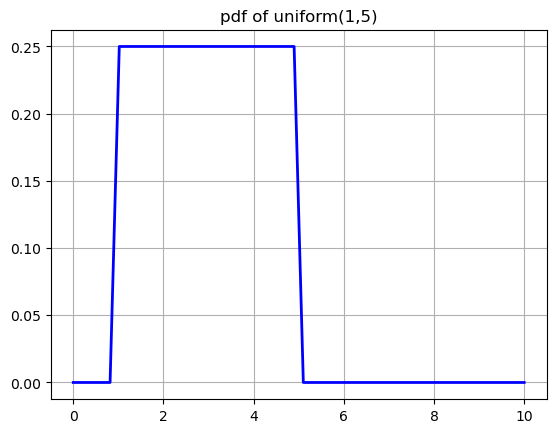

[0.   0.   0.   0.   0.   0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]


In [54]:
# 1.設定使用參數
low=1
high=5
x=np.linspace(0, 10, 50) #0-10之間產生50點
# 2. 產生 pdf
y = stats.uniform.pdf(x,low, high-low)
plt.plot(x, y, "b-", linewidth=2)  #plt.plot(x, y, 'style_code'); b- =>藍色實線
plt.grid(True)
plt.title('pdf of uniform(1,5)')
plt.show()
print(y)
#結論: 數字小和大時，發生機率低，主要集中在數字1-5間

累積機率 uniform.cdf

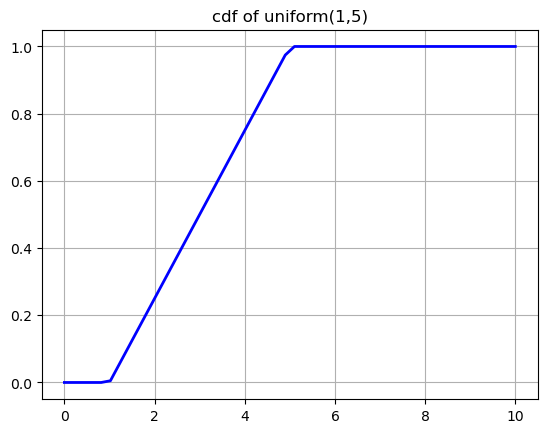

In [30]:
y = stats.uniform.cdf(x,low, high-low)
plt.plot(x, y, "b-", linewidth=2)  #plt.plot(x, y, 'style_code'); b- =>藍色實線
plt.grid(True)
plt.title('cdf of uniform(1,5)')
plt.show()
#結論: 數字小和大時，斜度平緩，數字1-5間斜度高

ppf: 透過 cdf ，給定一個 機率值，反推出對應到的 x

[1.   1.   1.   1.   1.   2.25 2.25 2.25 2.25 2.25 2.25 2.25 2.25 2.25
 2.25 2.25 2.25 2.25 2.25 2.25 2.25 2.25 2.25 2.25 2.25 1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.  ]


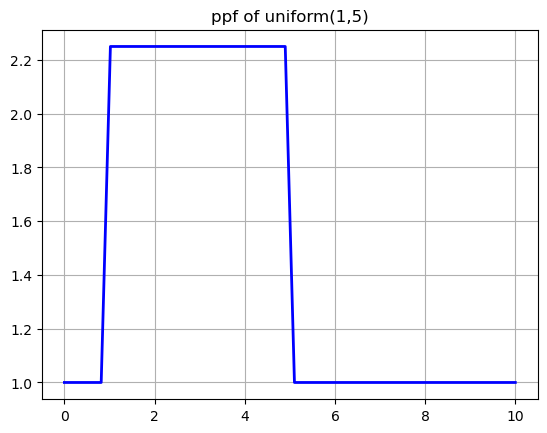

In [37]:
cumsum_probs = y
k = stats.uniform.ppf(cumsum_probs , low, high)
print(k)
plt.plot(x, k, "b-", linewidth=2)  #plt.plot(x, y, 'style_code'); b- =>藍色實線
plt.grid(True)
plt.title('ppf of uniform(1,5)')
plt.show()

樣本點

[3.78536539 1.29190841 3.82148149 1.59301823 1.1615913  1.18640754
 4.44795137 3.67114765 2.32421808 3.50981146 2.36100962 4.81580944
 2.77266464 4.13630235 2.14227218 2.91141798 2.55221502 4.13827202
 2.89534306 3.50270435]


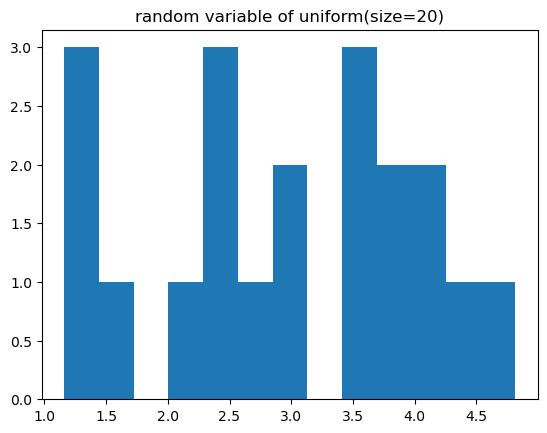

In [8]:
X = stats.uniform.rvs(low, high-low,size=20) #size抽出多少樣本
print(X)
plt.hist(X,bins=13)
plt.title('random variable of uniform(size=20)')
plt.show()

#結論: 數字小和大時，斜度平緩，數字1-5間斜度高

計算固定參數下，隨機變數的平均數、變異數、偏度和峰度。

In [39]:
stat_uniform=stats.uniform.stats(low, high-low,moments='mvks')
print(stat_uniform)
print(type(stat_uniform))
print("randint mean=",float(stat_uniform[0]))
print("randint variance=",float(stat_uniform[1]))
print("randint kurtosis=",float(stat_uniform[2]))
print("randint skew=",float(stat_uniform[3]))

(array(3.), array(1.33333333), array(0.), array(-1.2))
<class 'tuple'>
randint mean= 3.0
randint variance= 1.3333333333333333
randint kurtosis= 0.0
randint skew= -1.2


### 2. 常態分配( Normal Distribution )

[stats.norm 相關用法](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)  
X~N(mu, sigma) => 隨機變數X 服從mu和sigma的常態分配  
stats.norm 中的 loc,scale 分別代表  
loc=mu  
scale=sigma  

機率質量函數 norm.pdf

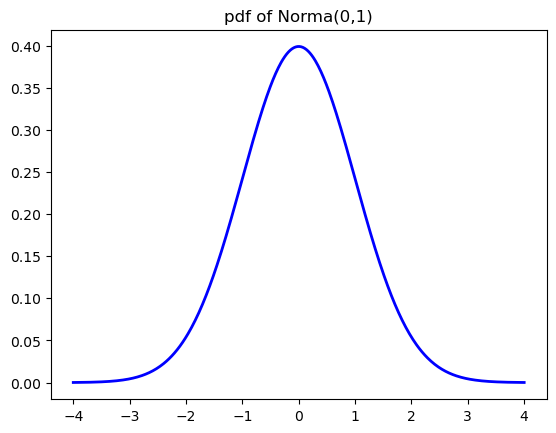

[-4.         -3.98396794 -3.96793587 -3.95190381 -3.93587174 -3.91983968
 -3.90380762 -3.88777555 -3.87174349 -3.85571142]


In [59]:
#1.設定使用參數
mu=0
sigma=1
x=np.linspace(-4, 4, 500) #產生隨機變數。-4~4之間，隨機產生500個點
# 2.產生 pdf圖
y = stats.norm.pdf(x,mu, sigma)
plt.plot(x, y, "b-", linewidth=2)
#plt.grid(True)
plt.title('pdf of Norma(0,1)')
plt.show()
print(x[:10])

累積機率函數 norm.cdf

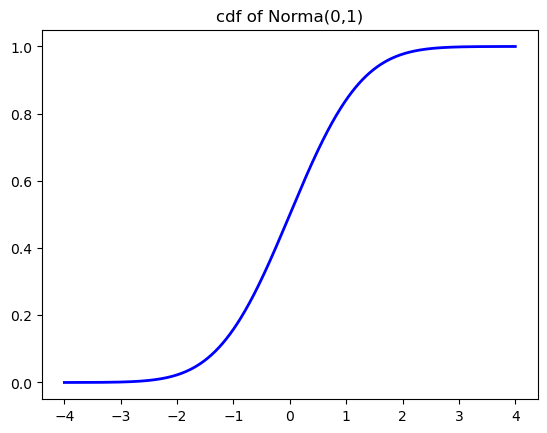

In [57]:
# 2.產生 pdf圖
z = stats.norm.cdf(x,mu, sigma)
plt.plot(x, z, "b-", linewidth=2)
#plt.grid(True)
plt.title('cdf of Norma(0,1)')
plt.show()

ppf: 透過 cdf ，給定一個 機率值，反推出對應到的 x

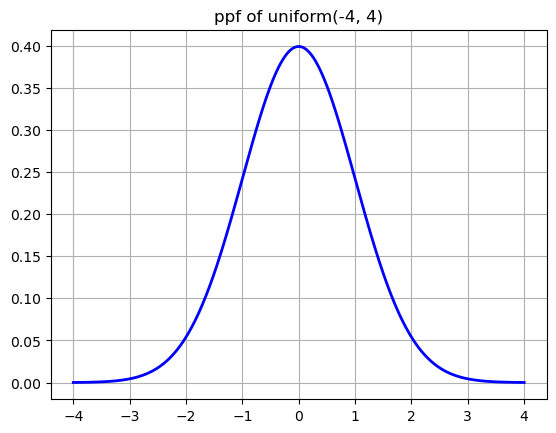

[0.00013383 0.00014268 0.00015207 0.00016203 0.00017261 0.00018383
 0.00019573 0.00020834 0.00022171 0.00023588]


In [60]:
cumsum_probs = y
k = stats.uniform.ppf(cumsum_probs , mu, sigma)
plt.plot(x, k, "b-", linewidth=2)  #plt.plot(x, y, 'style_code'); b- =>藍色實線
plt.grid(True)
plt.title('ppf of uniform(-4, 4)')
plt.show()
print(k[:10])

樣本點

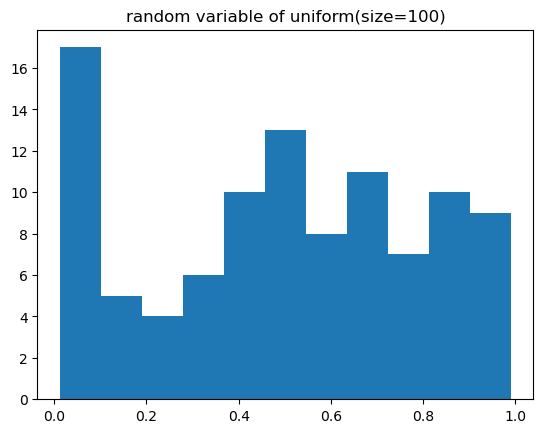

In [64]:
X = stats.uniform.rvs(mu, sigma-mu,size=100) #size抽出多少樣本
plt.hist(X,bins=11)
plt.title('random variable of uniform(size=100)')
plt.show()

ppf: 透過 cdf ，給定一個 機率值，反推出對應到的 x

In [65]:
stat_uniform=stats.uniform.stats(mu, sigma-mu,moments='mvks')
print(stat_uniform)
print(type(stat_uniform))
print("randint mean=",float(stat_uniform[0]))
print("randint variance=",float(stat_uniform[1]))
print("randint kurtosis=",float(stat_uniform[2]))
print("randint skew=",float(stat_uniform[3]))

(array(0.5), array(0.08333333), array(0.), array(-1.2))
<class 'tuple'>
randint mean= 0.5
randint variance= 0.08333333333333333
randint kurtosis= 0.0
randint skew= -1.2


# Homework

Q1：計算標準常態分配，小於 1 的機率有多大？  
Q2：計算標準常態分配，大於1，小於 -1 的機率有多大？  
Q3：X~N(2,4),x 服從常態分配，平均數為2,變異數為 4，計算 X小於 6 的機率有多大?  

In [4]:
from numpy.random import normal, uniform
from numpy.random import seed
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
import pylab
%matplotlib inline

Q1：計算標準常態分配，小於 1 的機率有多大？

In [5]:
#stats.norm.cdf(連續隨機變量, 指定平均值, 指定標準差)
mu = 0
sigma = 1
b = stats.norm.cdf(1, mu, sigma)
print("P(Z < 1) = ", b)

P(Z < 1) =  0.8413447460685429


Q2：計算標準常態分配，大於1，小於 -1 的機率有多大？

In [7]:
mu = 0
sigma = 1
b = stats.norm.cdf(1, mu, sigma)
a = stats.norm.cdf(-1, mu, sigma)
print("P(-1<Z<1) = ", 1-(b-a))

P(-1<Z<1) =  0.31731050786291415


Q3：X~N(2,4),x 服從常態分配，平均數為2,變異數為 4，計算 X小於 6 的機率有多大?

In [8]:
#方法1:
mu = 2 #平均數
sigma = 2 #標準差，所以變異數要開根號
b = stats.norm.cdf(6, mu, sigma)
print("P( X<6 = )", b)

P( X<6 = ) 0.9772498680518208


In [10]:
#方法2:
#先做標準化: (隨機變數-平均數)/標準差 = (6-2)/2 = 2 =>標準常態下，小於2的機率是多少?
mu = 0
sigma = 1
b = stats.norm.cdf(2, mu, sigma)
print("P( X<2 = )", b)

P( X<2 = ) 0.9772498680518208


Q4：計算 X~N(2,4)，小於 3 的機率有多大？

In [11]:
mu = 2 #平均數
sigma = 2 #標準差，所以變異數要開根號
b = stats.norm.cdf(3, mu, sigma)
print("P( X<3 = )", b)

P( X<3 = ) 0.6914624612740131
